In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header = None)
df_wine.columns = ['Class label', 'Alcohol',
 'Malic acid', 'Ash',
 'Alcalinity of ash', 'Magnesium',
 'Total phenols', 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity', 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

In [6]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
#dividing the dataset into train and test data
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,
                                                   random_state = 0,
                                                   stratify = y)

In [22]:
#Scalling the parameters 
#Min-Max scaler
from sklearn.preprocessing import MinMaxScaler

In [23]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

In [24]:
print(len(X_train_norm))
print(len(y_train))

124
124


In [14]:
#Standardizing featue vectors
from sklearn.preprocessing import StandardScaler

In [15]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [16]:
#we can also use robusst scaler when the dataset is small and contains many outliers 

In [17]:
# using l1 nomalization to penalize the weights and getting sparse weight matrix output
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression(penalty='l1',
                       C = 1.0,
                       solver = 'liblinear',
                       multi_class='ovr')

In [25]:
lr.fit(X_train_std,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
print(lr.score(X_test_std,y_test))

1.0


In [28]:
#since the test accuracy is 1 our model does a perfect job on both datasets

In [31]:
lr.intercept_
#return 3 values since there are three classes 

array([-1.26342147, -1.21625208, -2.37057691])

In [33]:
lr.coef_
#returns sparse matrices of weights since we have used penlties as l1

array([[ 1.24628287,  0.17988657,  0.74603965, -1.16401117,  0.        ,
         0.        ,  1.15917448,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55862586,  2.50877232],
       [-1.53674426, -0.38736298, -0.99514737,  0.36490896, -0.05952659,
         0.        ,  0.6680588 ,  0.        ,  0.        , -1.93428088,
         1.23346132,  0.        , -2.23245951],
       [ 0.13564076,  0.16845244,  0.35712659,  0.        ,  0.        ,
         0.        , -2.43810134,  0.        ,  0.        ,  1.56361499,
        -0.81917316, -0.49233623,  0.        ]])

Each row consists of 13 weights,
where each weight is multiplied by the respective feature in the 13-dimensional
Wine dataset to calculate the net input:
![title](img/logistic.jpg)

we will vary the regularization
strength and plot the regularization path—the weight coefficients of the different
features for different regularization strengths

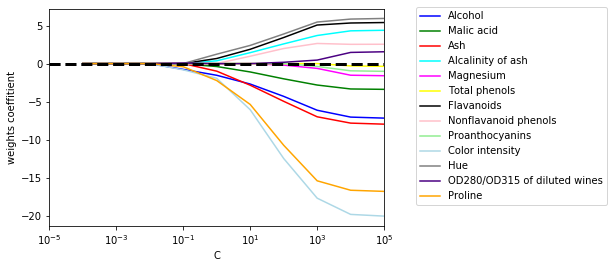

In [45]:
fig= plt.figure()
ax = plt.subplot(111)
colors = ['blue','green','red','cyan','magenta','yellow','black','pink','lightgreen','lightblue','gray','indigo','orange','pink']
weights, params = [],[]
for c in np.arange(-4,6):
    lr = LogisticRegression(penalty='l1',C=10.**c,solver = 'liblinear',multi_class='ovr',random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:,column],label = df_wine.columns[column+1],color = color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**(5)])
plt.ylabel('weights coeffitient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc = 'upper left')
ax.legend(loc = 'upper center',
         bbox_to_anchor=(1.38, 1.03),
            ncol=1, fancybox=True)
plt.show()